In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Makeover Monday 2020 W7 –– World Wealth

For this week's challenge, we are looking at global wealth by nation and continent.

Source Article: [All the World's Wealth in One Visual](https://howmuch.net/articles/distribution-worlds-wealth-2019)

Data Source: [Credit Suisse](https://www.credit-suisse.com/)

Makeover Monday Data: [data.world](https://data.world/makeovermonday/2020w7)

## Data Analysis

### Loading the Data:

In [2]:
df = pd.read_excel('WorldWealth.xlsx')

### First Look at Data:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 3 columns):
Country        214 non-null object
Region         206 non-null object
Wealth ($B)    205 non-null object
dtypes: object(3)
memory usage: 5.1+ KB


We have some missing values in the data and the wealth column is read as a string.

In [4]:
df.head()

,Country,Region,Wealth ($B)
0,United States,North America,"$105,990"
1,China,China,"$63,827"
2,Japan,Asia-Pacific,"$24,992"
3,Germany,Europe,"$14,660"
4,United Kingdom,Europe,"$14,341"


The wealth column cannot be read as integers with the dollar signs and commas. We need to remove those. China is also strangely listed as a region.

In [9]:
df.describe()

,Country,Region,Wealth ($B)
count,214,206,205
unique,214,7,142
top,Benin,Asia-Pacific,$2
freq,1,63,11


The 7 region division should be verified given the China region.

### Data Cleaning:

#### Fixing the null values

In [5]:
# looking into missing values
df[df.isnull().any(axis=1)]

,Country,Region,Wealth ($B)
97,Bosnia and Herzegovina,NaN,NaN
98,Europe,NaN,NaN
154,Northern Mariana Islands,NaN,NaN
155,Asia-Pacific,NaN,NaN
195,Central African Republic,NaN,NaN
196,Africa,NaN,NaN
203,St. Vincent and the Grenadines,NaN,NaN
204,Latin America,NaN,NaN
213,Venezuela,Latin America,NaN


These values will be removed since they have no information. We could alternatively look online for the proper values, but for the pruposes of this exercise, I'll stick to the given dataset.

In [6]:
# drop empty wealth rows
df1 = df.dropna().copy()

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 212
Data columns (total 3 columns):
Country        205 non-null object
Region         205 non-null object
Wealth ($B)    205 non-null object
dtypes: object(3)
memory usage: 6.4+ KB


The missing values have been removed.

#### Fixing the wealth column

In [7]:
# Remove the '$' and ',' from wealth column
df1['Wealth ($B)'] = df1['Wealth ($B)'].str.replace(',', '')
df1['Wealth ($B)'] = df1['Wealth ($B)'].str.replace('$', '')

df1.head()

,Country,Region,Wealth ($B)
0,United States,North America,105990
1,China,China,63827
2,Japan,Asia-Pacific,24992
3,Germany,Europe,14660
4,United Kingdom,Europe,14341


In [8]:
# convert to a numeric column
df1['Wealth ($B)'] = pd.to_numeric(df1['Wealth ($B)'])

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 212
Data columns (total 3 columns):
Country        205 non-null object
Region         205 non-null object
Wealth ($B)    205 non-null int64
dtypes: int64(1), object(2)
memory usage: 6.4+ KB


The wealth column has been successfully made into a numeric column.

#### Fixing regions

In [9]:
# check unique region values
df1['Region'].unique()

array(['North America', 'China', 'Asia-Pacific', 'Europe', 'India',
       'Latin America', 'Africa'], dtype=object)

China and India are listed as regions. They need to be regrouped.

In [15]:
# fixing regions
df1.replace({'Region': {'China': 'Asia-Pacific', 'India': 'Asia-Pacific'}}, inplace = True)

df1['Region'].unique()

array(['North America', 'Asia-Pacific', 'Europe', 'Latin America',
       'Africa'], dtype=object)

China and India have been put into Asia-Pacific.

### Summary Statistics

In [16]:
df1.describe(include = 'all')

,Country,Region,Wealth ($B)
count,205,205,205.000000
unique,205,5,NaN
top,Benin,Asia-Pacific,NaN
freq,1,65,NaN
mean,NaN,NaN,1758.409756
std,NaN,NaN,9010.680069
min,NaN,NaN,0.000000
25%,NaN,NaN,12.000000
50%,NaN,NaN,64.000000
75%,NaN,NaN,377.000000


The data covers 205 countries from 5 regions. The minimum national wealth in billions of dollars is 0, the mean is 1758.41 with a standard deviation of 9010.68, the median is 64, and the max is 105990.

### Initial Graph:

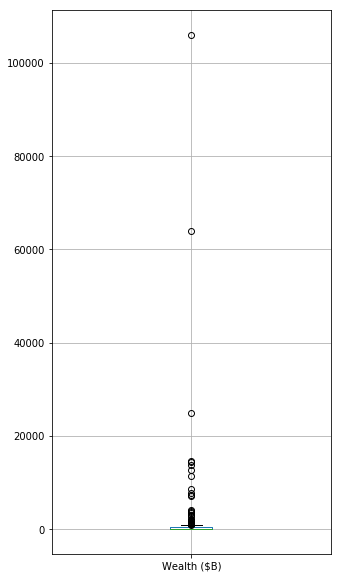

In [22]:
fig = df1.boxplot(figsize=(5,10))

This graph is clearly

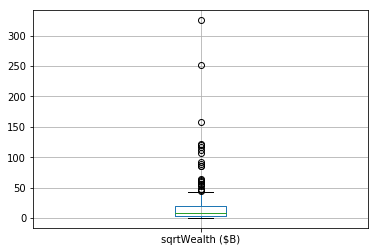

In [12]:
df1['sqrtWealth ($B)'] = np.sqrt(df1['Wealth ($B)'])

fig2 = df1.boxplot('sqrtWealth ($B)')

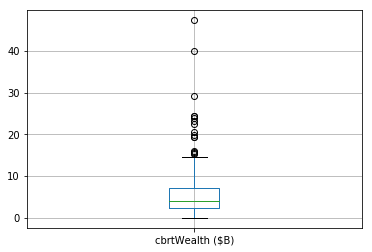

In [13]:
df1['cbrtWealth ($B)'] = np.cbrt(df1['Wealth ($B)'])

fig3 = df1.boxplot('cbrtWealth ($B)')

In [14]:
fig.get_figure().savefig("pdplot_WorldWeath.png")

fig

### Data Exploration:

#### Birth Years with 100% Wartime

In [17]:
df1[['Region', 'Wealth ($B)']].groupby('Region').describe()

Wealth ($B)                                                   \
                    count          mean           std   min    25%     50%   
Region                                                                       
Africa               53.0     77.641509    174.071945   0.0   6.00    14.0   
Asia-Pacific         65.0   2172.323077   8569.326297   0.0  21.00   114.0   
Europe               46.0   1970.586957   3891.894909   7.0  72.75   265.0   
Latin America        37.0    267.675676    716.341246   2.0   5.00    42.0   
North America         4.0  28651.750000  51716.168609  21.0  22.50  4298.0   

                                   
                    75%       max  
Region                             
Africa            48.00     898.0  
Asia-Pacific     775.00   63827.0  
Europe          1646.00   14660.0  
Latin America    145.00    3535.0  
North America  32927.25  105990.0

In [ ]:
df2 = df1.groupby('Region')

Every American born since 2001 has never experienced the United States in peacetime.

#### Birth Years more than 50% Wartime

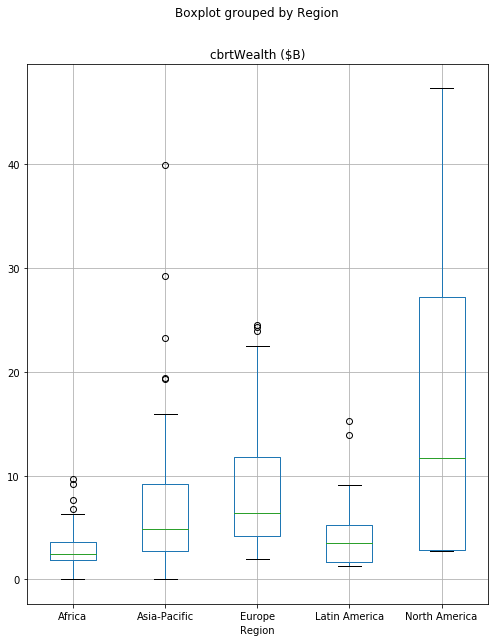

In [19]:
df1.boxplot(column=['cbrtWealth ($B)'], by='Region', figsize=(8, 10))

In [50]:
df_agg = df1.groupby(['Region']).sum()[['Wealth ($B)']]

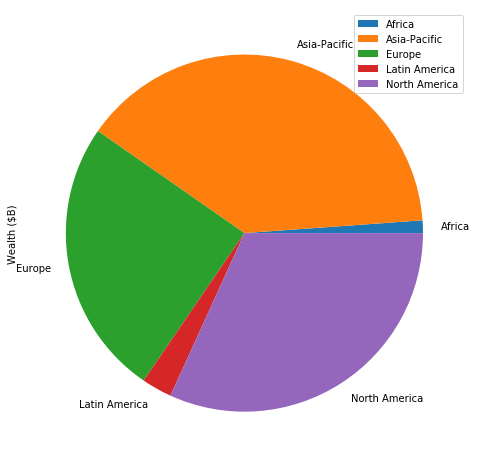

In [48]:
df1.groupby(['Region']).sum().plot.pie(y = 'Wealth ($B)', figsize=(8, 10))

In [44]:
df1.groupby('Region').apply(lambda x: x.sort_values(by = 'Wealth ($B)', ascending=False).head(5)).reset_index(drop=True)

,Country,Region,Wealth ($B),sqrtWealth ($B),cbrtWealth ($B)
0,Egypt,Africa,898,29.966648,9.647737
1,South Africa,Africa,770,27.748874,9.165656
2,Nigeria,Africa,443,21.047565,7.623152
3,Morocco,Africa,305,17.464249,6.731315
4,Algeria,Africa,252,15.874508,6.316360
5,China,Asia-Pacific,63827,252.640060,39.963926
6,Japan,Asia-Pacific,24992,158.088583,29.237058
7,India,Asia-Pacific,12614,112.312065,23.278283
8,Korea,Asia-Pacific,7302,85.451741,19.400546
9,Australia,Asia-Pacific,7202,84.864598,19.311575


In [93]:
df_top5 = df1.groupby('Region').apply(lambda x: x.replace(x.sort_values(by = 'Wealth ($B)', ascending=False)['Country'][3:].tolist(), 'Other').groupby('Country').sum()).reset_index()

df_top5

,Region,Country,Wealth ($B),sqrtWealth ($B),cbrtWealth ($B)
0,Africa,Egypt,898,29.966648,9.647737
1,Africa,Nigeria,443,21.047565,7.623152
2,Africa,Other,2004,248.376255,136.318928
3,Africa,South Africa,770,27.748874,9.165656
4,Asia-Pacific,China,63827,252.640060,39.963926
5,Asia-Pacific,India,12614,112.312065,23.278283
6,Asia-Pacific,Japan,24992,158.088583,29.237058
7,Asia-Pacific,Other,39768,1050.940914,362.086615
8,Europe,France,13729,117.170815,23.944897
9,Europe,Germany,14660,121.078487,24.474359


Americans born in 1963-1967 and 1981-present have spent the majority of their lives in wartime.

#### Reverse Engineering Specific War Dates and Statistics

We see here how different wars extended wartime experience for Americans. The Vietnam War and Afghanistan Wars are distinctly long. We also see here that the Vietnam War manages to temporarily push the percentage in wartime above 50% for a short period in the mid 1960s before the percentage resurges in peacetime births near the Afghanistan War. 

### Deeper Data Graph:

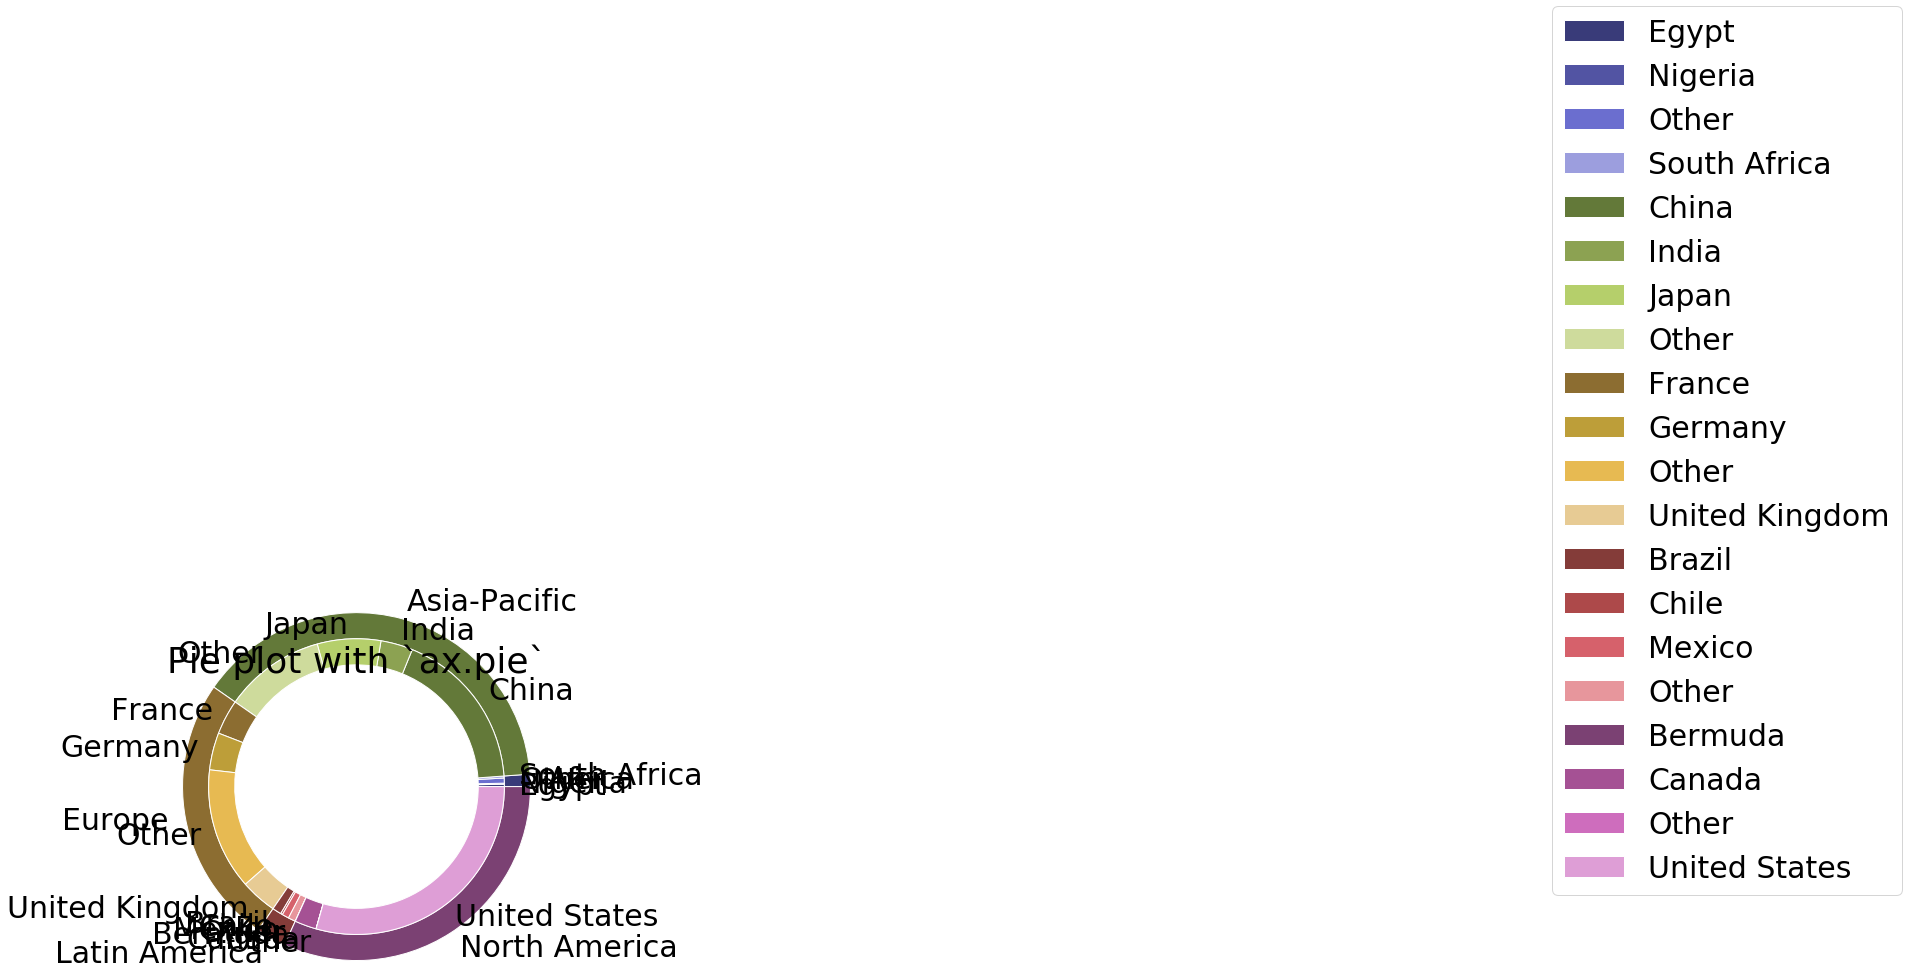

In [145]:
plt.rcParams.update({'font.size': 30})

fig, ax = plt.subplots()

size = .3
vals = np.array([[60., 32.], [37., 40.], [29., 10.], [60., 40.], [100., 10.]])

cmap = plt.get_cmap("tab20b")
outer_colors = cmap(np.arange(5)*4)
inner_colors = cmap(np.arange(20))

pie_outer, _ = ax.pie(df_agg['Wealth ($B)'], radius=2, colors=outer_colors, labels = df_agg.reset_index()['Region'].tolist(),
       wedgeprops=dict(width=size, edgecolor='w'))

pie_inner, _ = ax.pie(df_top5['Wealth ($B)'], radius=2-size, colors=inner_colors, labels = df_top5['Country'].tolist(),
       wedgeprops=dict(width=size, edgecolor='w'))

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[5:], subgroup_names_legs, loc=(6, 0))

ax.set(aspect="equal", title='Pie plot with `ax.pie`')
plt.show()



### Tableau Graph:

My Tableau graph is published [here](https://public.tableau.com/views/2020W6-US_Wartime_Living/USWartimeLife?:display_count=y&publish=yes&:origin=viz_share_link).